In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans

def preprocess_images(image_folder, image_height, image_width):
    # Create empty lists to store the images and labels
    images = []
    labels = []

    # Iterate through the files in the image folder
    for file_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, file_name)

        # Check if the file is an image
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image and resize it to the desired dimensions
            image = load_img(image_path, target_size=(image_height, image_width))
            image_array = img_to_array(image)

            # Normalize the pixel values to [0, 1]
            image_array /= 255.0

            # Add the image and label to the respective lists
            images.append(image_array)
            labels.append(file_name)  # Modify this line to set the label based on your dataset

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return {"images": images, "labels": labels}


# Set the path to the folder containing the MRI scan images
image_folder = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke'

# Set the desired image dimensions
image_height = 256
image_width = 256

# Preprocess the images and obtain the output as a dictionary
preprocessed_data = preprocess_images(image_folder, image_height, image_width)

# Access the images array from the output dictionary
images = preprocessed_data["images"]

# Flatten the image data for feature extraction
num_images, height, width, channels = images.shape
flattened_images = images.reshape((num_images, height * width * channels))

# Apply feature extraction techniques
# Modify this section based on the specific feature extraction methods you want to use
# Extract features such as intensity values, texture features, or shape-based features
# You can use libraries like scikit-image or OpenCV for feature extraction

# Apply K-means clustering
num_clusters = 2  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)  # Explicitly set the value of n_init
kmeans.fit(flattened_images)

# Get the cluster labels for the dataset
labels = kmeans.labels_

# Access the cluster centroids
centroids = kmeans.cluster_centers_


In [ ]:
# Print the count of images in each cluster
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Cluster Counts:")
for cluster_label, count in zip(unique_labels, label_counts):
    print("Cluster {}: {} images".format(cluster_label, count))

Cluster Counts:
Cluster 0: 465 images
Cluster 1: 485 images


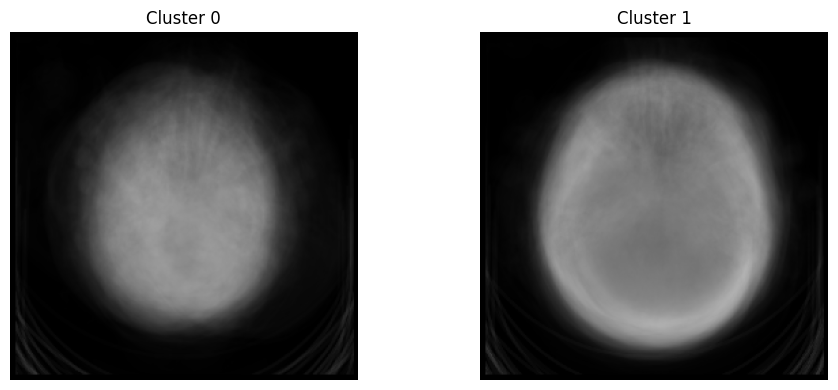

In [ ]:
# Cluster Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(10, 4))
for i, centroid in enumerate(centroids):
    # Reshape the centroid to the original image dimensions if needed
    centroid_image = centroid.reshape((height, width, channels))

    # Plot the centroid image
    axes[i].imshow(centroid_image)
    axes[i].set_title("Cluster {}".format(i))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
# Apply PCA for dimensionality reduction
num_components = 100  # Specify the number of components for PCA
pca = PCA(n_components=num_components, random_state=0)
reduced_images = pca.fit_transform(flattened_images)

NameError: ignored

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=537d44d3ae6b7a28e31e2ec034b955ba428119d3ff2c446b6ac104cd3ac60b9b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz

def fuzzy_c_means_clustering(data, num_clusters):
    # Compute the transpose of the data matrix
    data_T = np.transpose(data)

    # Apply fuzzy C-means clustering
    cntr, membership_matrix, _, _, _, _, _ = fuzz.cluster.cmeans(data_T, num_clusters, 2, error=0.005, maxiter=1000, seed=0)

    # Transpose the membership matrix back to the original shape
    membership_matrix = np.transpose(membership_matrix)

    return membership_matrix


# Perform fuzzy C-means clustering
membership_matrix = fuzzy_c_means_clustering(flattened_images, num_clusters)

# Compute the membership degree of each data point in each cluster
max_membership_degrees = np.max(membership_matrix, axis=1)

# Set a threshold to classify the data points into healthy or stroke-affected regions
threshold = 0.5

# Assign each data point to either healthy or stroke-affected region based on the threshold
segmentation = np.where(max_membership_degrees > threshold, "Stroke-affected", "Healthy")

# Print the segmentation results
for idx, seg in enumerate(segmentation):
    print(f"Image {idx+1}: {seg}")


Image 1: Stroke-affected
Image 2: Stroke-affected
Image 3: Stroke-affected
Image 4: Stroke-affected
Image 5: Stroke-affected
Image 6: Stroke-affected
Image 7: Stroke-affected
Image 8: Stroke-affected
Image 9: Stroke-affected
Image 10: Stroke-affected
Image 11: Stroke-affected
Image 12: Stroke-affected
Image 13: Stroke-affected
Image 14: Stroke-affected
Image 15: Stroke-affected
Image 16: Stroke-affected
Image 17: Stroke-affected
Image 18: Stroke-affected
Image 19: Stroke-affected
Image 20: Stroke-affected
Image 21: Stroke-affected
Image 22: Stroke-affected
Image 23: Stroke-affected
Image 24: Stroke-affected
Image 25: Stroke-affected
Image 26: Stroke-affected
Image 27: Stroke-affected
Image 28: Stroke-affected
Image 29: Stroke-affected
Image 30: Stroke-affected
Image 31: Stroke-affected
Image 32: Stroke-affected
Image 33: Stroke-affected
Image 34: Stroke-affected
Image 35: Stroke-affected
Image 36: Stroke-affected
Image 37: Stroke-affected
Image 38: Stroke-affected
Image 39: Stroke-affe

In [ ]:
import os
import numpy as np
from google.colab import drive
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Mount Google Drive to access data
drive.mount('/content/drive', force_remount=True)

# Define the path to the folder containing MRI scan images in Google Drive
image_folder = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke'

# Define the desired image dimensions
image_height = 256
image_width = 256

# Load and preprocess your MRI scan images
def load_and_preprocess_data(image_folder, image_height, image_width):
    images = []
    labels = []

    # Iterate through the files in the image folder
    for file_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, file_name)

        # Check if the file is an image
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image and resize it to the desired dimensions
            image = load_img(image_path, target_size=(image_height, image_width))
            image_array = img_to_array(image)

            # Normalize the pixel values to [0, 1]
            image_array /= 255.0

            # Add the image and label to the respective lists
            images.append(image_array)
            labels.append(file_name)  # Modify this line to set the label based on your dataset

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Bat Neural Network (BatNN) Optimization
def bat_nn_optimization(data, num_clusters, num_bats, num_iterations):
    best_num_clusters = None
    best_silhouette_score = -1  # Initialize with a low value

    for _ in range(num_iterations):
        # Generate a random candidate for the number of clusters
        num_clusters_candidate = np.random.randint(2, 10)

        # Perform fuzzy C-means clustering with the candidate number of clusters
        membership_matrix = fuzzy_c_means_clustering(data, num_clusters_candidate)

        # Calculate the silhouette score to evaluate the clustering quality
        silhouette = silhouette_score(data, np.argmax(membership_matrix, axis=1))

        # Update the best number of clusters if the candidate is better
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_clusters = num_clusters_candidate

    return best_num_clusters

# Fuzzy C-means Clustering
def fuzzy_c_means_clustering(data, num_clusters):
    data_T = np.transpose(data)
    cntr, membership_matrix, _, _, _, _, _ = fuzz.cluster.cmeans(data_T, num_clusters, 2, error=0.005, maxiter=1000, seed=0)
    membership_matrix = np.transpose(membership_matrix)
    return membership_matrix

# Main code
if __name__ == "__main__":
    # Load and preprocess the MRI scan images from Google Drive
    images, labels = load_and_preprocess_data(image_folder, image_height, image_width)

    # BatNN Optimization to find the best number of clusters
    best_num_clusters = bat_nn_optimization(images.reshape(images.shape[0], -1), num_clusters=None, num_bats=10, num_iterations=50)

    # Perform fuzzy C-means clustering with the optimized number of clusters
    best_membership_matrix = fuzzy_c_means_clustering(images.reshape(images.shape[0], -1), best_num_clusters)

    # Compute the membership degree of each data point in each cluster
    max_membership_degrees = np.max(best_membership_matrix, axis=1)

    # Set a threshold to classify the data points into regions
    threshold = 0.5

    # Assign each data point to a region based on the threshold
    segmentation = np.where(max_membership_degrees > threshold, "Stroke-affected", "Healthy")

    # Print the segmentation results
    for idx, seg in enumerate(segmentation):
        print(f"Image {idx + 1}: {seg}")


Mounted at /content/drive


KeyboardInterrupt: ignored

In [ ]:
import cv2
import numpy as np
import skfuzzy as fuzz

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to a fixed size
    target_size = (256, 256)
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to [0, 1]
    normalized_image = grayscale_image.astype(np.float32) / 255.0

    return normalized_image

def calculate_percentage(image_path, threshold):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Apply fuzzy C-means clustering
    num_clusters = 2
    data = preprocessed_image.reshape((-1, 1))
    membership_matrix = fuzz.cluster.cmeans(data.T, num_clusters, 2, error=0.005, maxiter=1000, seed=0)[1]

    # Calculate percentage of stroke-affected region
    membership_stroke = membership_matrix[0]
    stroke_affected_pixels = membership_stroke > threshold
    stroke_percentage = np.count_nonzero(stroke_affected_pixels) / stroke_affected_pixels.size * 100

    # Calculate percentage of healthy region
    healthy_percentage = 100 - stroke_percentage

    return stroke_percentage, healthy_percentage

# Set the threshold (adjust based on your desired sensitivity)
threshold = 0.5

# Specify the input image path
image_path = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke/58 (10).jpg'
# Calculate percentage of stroke-affected and healthy regions
stroke_percentage, healthy_percentage = calculate_percentage(image_path, threshold)

# Print the percentages
print(f"Stroke-affected region: {stroke_percentage:.2f}%")
print(f"Healthy region: {healthy_percentage:.2f}%")



Bat Algo


In [ ]:
pipimport cv2
import numpy as np
import skfuzzy as fuzz

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to a fixed size
    target_size = (256, 256)
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to [0, 1]
    normalized_image = grayscale_image.astype(np.float32) / 255.0

    return normalized_image

def calculate_percentage(data, threshold):
    # Apply fuzzy C-means clustering
    num_clusters = 2
    membership_matrix = fuzz.cluster.cmeans(data.T, num_clusters, 2, error=0.005, maxiter=1000, seed=0)[1]

    # Calculate percentage of stroke-affected region
    membership_stroke = membership_matrix[0]
    stroke_affected_pixels = membership_stroke > threshold
    stroke_percentage = np.count_nonzero(stroke_affected_pixels) / stroke_affected_pixels.size * 100

    # Calculate percentage of healthy region
    healthy_percentage = 100 - stroke_percentage

    return stroke_percentage, healthy_percentage

def bat_algorithm_optimization(data):
    # Bat Algorithm parameters
    num_bats = 10
    max_generations = 50
    A = 1  # Loudness
    r = 0.5  # Pulse rate

    # Initialize bats
    bats = np.random.rand(num_bats, *data.shape)
    solutions = np.random.rand(num_bats, *data.shape)

    # Initialize frequency range
    F_min = 0
    F_max = 1

    # Find initial best solution
    best_solution_index = 0
    best_fitness = float('inf')
    best_solution = solutions[best_solution_index]

    for generation in range(max_generations):
        for i in range(num_bats):
            # Update frequency
            freq = F_min + (F_max - F_min) * np.random.random()

            # Update solutions using echolocation and loudness
            difference = best_solution - solutions[i]
            loudness_term = A * np.random.random(size=data.shape)
            pulse_rate_term = 0.001 * np.random.randn(*data.shape)

            solutions[i] = solutions[i] + difference * freq + loudness_term

            # Update solutions using pulse rate
            if np.random.random() > r:
                solutions[i] = best_solution + pulse_rate_term

            # Apply constraints if needed (e.g., clamp values to [0, 1])
            solutions[i] = np.clip(solutions[i], 0, 1)

            # Calculate fitness and update best solution
            stroke_percentage, _ = calculate_percentage(data, solutions[i])
            fitness = abs(stroke_percentage - target_percentage)
            if fitness < best_fitness:
                best_fitness = fitness
                best_solution_index = i
                best_solution = solutions[best_solution_index]

    return best_solution


# Specify the input image path
image_path = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke/58 (10).jpg'

# Load the image and preprocess it
preprocessed_image = preprocess_image(image_path)
data = preprocessed_image.reshape((-1, 1))

# Set the target percentage for stroke-affected region
target_percentage = 30.0  # Adjust as needed

# Apply Bat Algorithm optimization
optimal_threshold = bat_algorithm_optimization(data)

# Calculate percentage of stroke-affected and healthy regions using the optimized threshold
stroke_percentage, healthy_percentage = calculate_percentage(data, optimal_threshold)

# Print the optimized threshold and percentages
print(f"Optimized Threshold: {optimal_threshold:.4f}")
print(f"Stroke-affected region: {stroke_percentage:.2f}%")
print(f"Healthy region: {healthy_percentage:.2f}%")


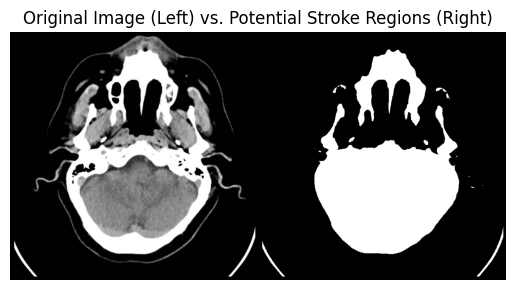

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke/58 (10).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment potential stroke regions
threshold_value = 200
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask image for drawing the contours
mask = np.zeros_like(image)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255, 0, 0), thickness=cv2.FILLED)

# Combine the original image and the mask (stroke regions)
combined_image = np.hstack((cv2.cvtColor(image, cv2.COLOR_GRAY2RGB), cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)))

# Display the images
plt.imshow(combined_image)
plt.title('Original Image (Left) vs. Potential Stroke Regions (Right)')
plt.axis('off')
plt.show()

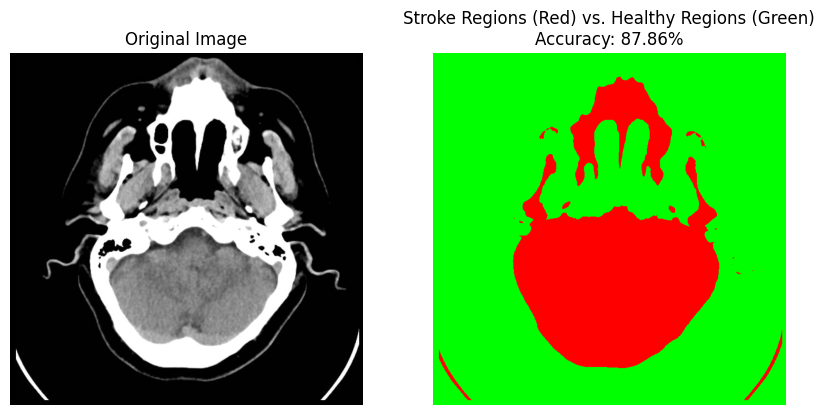

In [ ]:
  import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Stroke/58 (10).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment potential stroke regions
threshold_value = 200
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask image for drawing the contours
mask = np.zeros_like(image)

# Draw the contours on the mask (using red color for stroke regions)
cv2.drawContours(mask, contours, -1, (255, 0, 0), thickness=cv2.FILLED)

# Create a copy of the original image
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Apply the stroke mask to the image
image_rgb[mask == 255] = (255, 0, 0)  # Set stroke regions to red

# Apply the inverse of the stroke mask to get healthy regions
healthy_mask = cv2.bitwise_not(mask)
image_rgb[healthy_mask == 255] = (0, 255, 0)  # Set healthy regions to green

# Load the ground truth image (assuming you have the path)
ground_truth_path = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised/Normal/56 (10).jpg'
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Calculate the accuracy
true_positives = np.logical_and(mask == 255, ground_truth == 255).sum()
true_negatives = np.logical_and(healthy_mask == 255, ground_truth == 0).sum()
false_positives = np.logical_and(mask == 255, ground_truth == 0).sum()
false_negatives = np.logical_and(healthy_mask == 255, ground_truth == 255).sum()

denominator = true_positives + true_negatives + false_positives + false_negatives
accuracy = (true_positives + true_negatives) / denominator if denominator != 0 else 0

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_rgb)
axes[1].set_title('Stroke Regions (Red) vs. Healthy Regions (Green)\nAccuracy: {:.2f}%'.format(accuracy * 100))
axes[1].axis('off')

plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models

def load_data(data_dir, image_size):
    images_path = os.path.join(data_dir, 'Stroke')
    masks_path = os.path.join(data_dir, 'Stroke')

    image_files = sorted(os.listdir(images_path))
    mask_files = sorted(os.listdir(masks_path))

    images = []
    masks = []
    for image_file, mask_file in zip(image_files, mask_files):
        image_path = os.path.join(images_path, image_file)
        mask_path = os.path.join(masks_path, mask_file)

        image = Image.open(image_path).convert('L')  # Convert to grayscale
        mask = Image.open(mask_path).convert('L')

        image = image.resize(image_size)
        mask = mask.resize(image_size)

        images.append(np.array(image) / 255.0)  # Normalize to [0, 1]
        masks.append(np.array(mask) / 255.0)

    images = np.expand_dims(np.array(images), axis=-1)
    masks = np.expand_dims(np.array(masks), axis=-1)
    return images, masks

def unet(input_shape, num_classes):
    inputs = tf.keras.Input(input_shape)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Expanding path
    up5 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv3], axis=3)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv2], axis=3)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv1], axis=3)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(conv7)

    model = models.Model(inputs, outputs)
    return model

# Create a custom callback to print validation accuracy and loss after each epoch
class PrintValidationMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        val_loss = logs.get('val_loss')
        print(f"Epoch {epoch + 1}: Validation Accuracy = {val_accuracy}, Validation Loss = {val_loss}")

# Assuming your dataset is in the "dataset" folder
dataset_folder = '/content/drive/MyDrive/MRIDataset/Brain_Data_Organised'
input_shape = (256, 256)  # Resize images to 256x256
num_classes = 2

# Load the dataset
images, masks = load_data(dataset_folder, input_shape)

# Create the model
model = unet(input_shape + (1,), num_classes)  # Note the addition of (1,) for single-channel grayscale

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the custom callback to print validation metrics
batch_size = 16
epochs = 10
model.fit(images, masks, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[PrintValidationMetrics()])


In [ ]:
import os
import numpy as np
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Define the paths to your training and validation directories
training_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINTRAIN'
validation_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINVALIDATION'

# Function to load images and labels from a directory
def load_images_from_directory(directory):
    images = []
    labels = []
    for label, folder in enumerate(['NORMAL', 'STROKE']):
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            img = io.imread(os.path.join(folder_path, filename))
            images.append(np.array(img).reshape(-1))  # Convert the image to a 1D array
            labels.append(label)  # 0 for normal, 1 for stroke
    return np.array(images), np.array(labels)

# Load training and validation data
training_images, training_labels = load_images_from_directory(training_directory)
validation_images, validation_labels = load_images_from_directory(validation_directory)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with regularization parameters
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit the depth of trees to control overfitting
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the Random Forest model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", confusion)


In [ ]:
import joblib

model_folder = '/content/drive/MyDrive/Brain_Data_Organised'
os.makedirs(model_folder, exist_ok=True)  # Create the folder if it doesn't exist
model_filename = 'random_forest_model.pkl'
model_path = os.path.join(model_folder, model_filename)
joblib.dump(clf, model_path)

print(f"Model saved to {model_path}")

SVM

In [ ]:
import os
import numpy as np
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Define the paths to your training and validation directories
training_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINTRAIN'
validation_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINVALIDATION'

# Function to load images and labels from a directory (same as before)
def load_images_from_directory(directory):
    images = []
    labels = []
    for label, folder in enumerate(['NORMAL', 'STROKE']):
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            img = io.imread(os.path.join(folder_path, filename))
            images.append(np.array(img).reshape(-1))
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and validation data (same as before)
training_images, training_labels = load_images_from_directory(training_directory)
validation_images, validation_labels = load_images_from_directory(validation_directory)

# Split the dataset into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model (similar metrics as before)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Print the evaluation results for SVM
print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", report_svm)
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print("Confusion Matrix:\n", confusion_svm)


Logistic Reg


In [ ]:
import os
import numpy as np
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Define the paths to your training and validation directories
training_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINTRAIN'
validation_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINVALIDATION'

# Function to load images and labels from a directory (same as before)
def load_images_from_directory(directory):
    images = []
    labels = []
    for label, folder in enumerate(['NORMAL', 'STROKE']):
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            img = io.imread(os.path.join(folder_path, filename))
            images.append(np.array(img).reshape(-1))
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and validation data (same as before)
training_images, training_labels = load_images_from_directory(training_directory)
validation_images, validation_labels = load_images_from_directory(validation_directory)

# Split the dataset into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model (similar metrics as before)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print the evaluation results for Logistic Regression
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", report_logistic)
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print("Confusion Matrix:\n", confusion_logistic)


knn

In [ ]:
import os
import numpy as np
from skimage import io
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Define the paths to your training and validation directories
training_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINTRAIN'
validation_directory = '/content/drive/MyDrive/Brain_Data_Organised/NORMAL STROKE/BRAINVALIDATION'

# Function to load images and labels from a directory
def load_images_from_directory(directory):
    images = []
    labels = []
    for label, folder in enumerate(['NORMAL', 'STROKE']):
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            img = io.imread(os.path.join(folder_path, filename))
            images.append(np.array(img).reshape(-1))  # Convert the image to a 1D array
            labels.append(label)  # 0 for normal, 1 for stroke
    return np.array(images), np.array(labels)

# Load training and validation data
training_images, training_labels = load_images_from_directory(training_directory)
validation_images, validation_labels = load_images_from_directory(validation_directory)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=10,  # Maximum depth of trees
    learning_rate=0.1,  # Learning rate
    random_state=42
)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", confusion)



